In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-dataset/anime.csv


In [2]:
df = pd.read_csv("../input/anime-dataset/anime.csv", engine='python')
display(df.head())
print(df.describe())

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


                eps     duration       startYr      finishYr        watched  \
count  14219.000000  9137.000000  14356.000000  14134.000000   14356.000000   
mean      13.501231    23.465142   2005.457788   2005.515919    2408.043396   
std       62.262185    30.777048     14.707105     14.656509    7168.368428   
min        1.000000     1.000000   1907.000000   1907.000000       0.000000   
25%        1.000000     3.000000   2000.000000   2000.000000      25.000000   
50%        1.000000     8.000000   2010.000000   2010.000000     165.000000   
75%       12.000000    29.000000   2016.000000   2016.000000    1469.500000   
max     2527.000000   235.000000   2026.000000   2026.000000  161567.000000   

           watching     wantWatch       dropped        rating          votes  
count  14578.000000  14578.000000  14578.000000  12107.000000   12119.000000  
mean     213.026684   1021.729112    125.963026      2.948697    2085.787771  
std     1261.707640   2145.010604    453.577348    

I'll be using IMDB's weighted rating (wr):

![](https://image.ibb.co/jYWZp9/wr.png)

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

This is a good way to avoid weight more the animes that has been recently released and have more stars and less votes.
   

In [3]:
C = df['rating'].mean()
m = df['votes'].quantile(0.85)
print('Mean rating {:.2}, quantite of votes needes to stay {:.0f}'.format(C,m))


Mean rating 2.9, quantite of votes needes to stay 3190


In [4]:
df2 = df.loc[df['votes'] >= m]
print(df.shape)
print(df2.shape)

(14578, 18)
(1818, 18)


Make a function to obtain the score of each anime

In [5]:
def weight_rating(x, m=m, C=C):
    v = x['votes']
    R = x['rating']
    
    return (v/(v+m) * R) + (m/(m+v) * C)

In [6]:
df2['score'] = df2.apply(weight_rating, axis=1)

![](http://)Base on this type of rating the number of anime decreased a lot, but the main idea is to keep the rating equally as possible to (first) recommend the best animes.

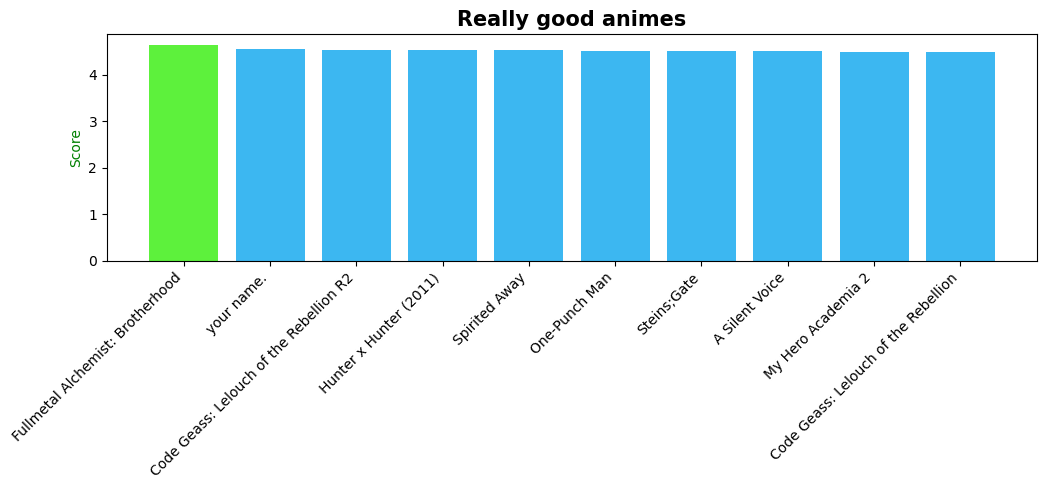

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


plt.figure(figsize=(12, 3), dpi=100)


color_map = ['#3CB7F1' for _ in range(10)]
color_map[0] = '#5DF13C'


best_score = df2.sort_values(by=['score'], ascending=False)[:10]



g = plt.bar(best_score["title"], best_score['score'], color=color_map)
plt.ylabel("Score", color='green')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Really good animes', fontweight='bold', fontsize=15);


Just to check, let's do the same but with all the ratings in the original data.

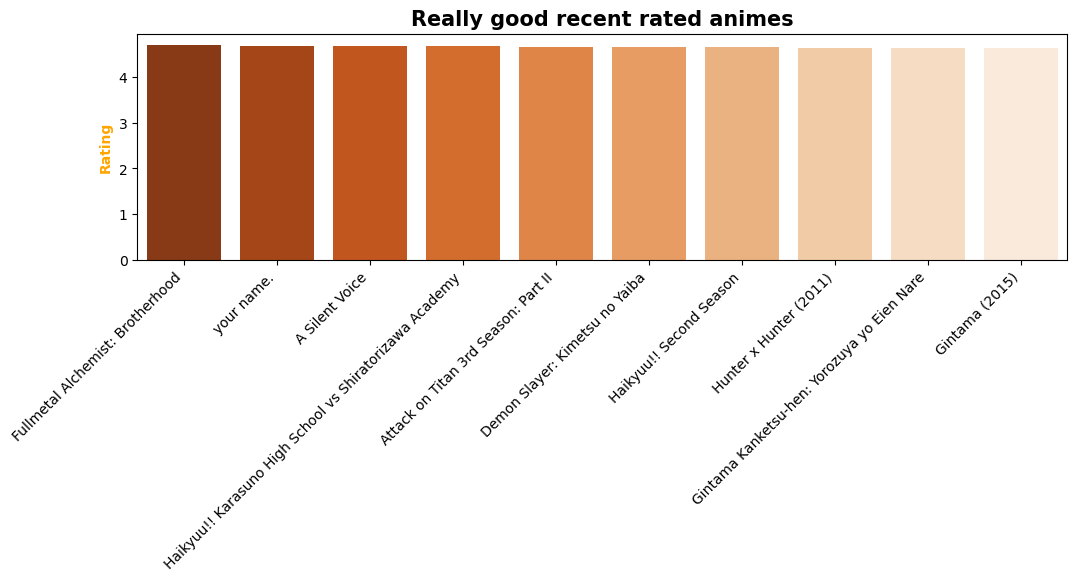

In [8]:
best_rating_not_filter = df.sort_values(by=['rating'], ascending=False)[:10]


plt.figure(figsize=(12, 3), dpi=100)
g = sns.barplot(best_rating_not_filter["title"], best_rating_not_filter['rating'], palette="Oranges_r")
plt.ylabel("Rating", color='orange', fontweight='bold')
plt.xlabel("")
g.set_xticklabels(g.get_xticklabels(), rotation=45,  horizontalalignment='right')
plt.title('Really good recent rated animes', fontweight='bold', fontsize=15);

**So, if a friend tells you "*hey, I wanna watch a anime, any recommendations?*" You could say, yes:**

In [9]:
best_scores = best_score[['score','title','watched', 'studios']].set_index('title')
display(best_scores)

,score,watched,studios
title,,,
Fullmetal Alchemist: Brotherhood,4.639667,103707.0,['Bones']
your name.,4.547006,58831.0,['CoMix Wave Films']
Code Geass: Lelouch of the Rebellion R2,4.537640,83367.0,['Sunrise']
Hunter x Hunter (2011),4.527497,50195.0,['MADHOUSE']
Spirited Away,4.527147,115949.0,['Studio Ghibli']
One-Punch Man,4.516511,85357.0,['MADHOUSE']
Steins;Gate,4.515188,56275.0,['WHITE FOX']
A Silent Voice,4.513127,45892.0,['Kyoto Animation']
My Hero Academia 2,4.495101,64695.0,['Bones']


But, maybe, your friend hasn't watched too much anime, and also he doesn't want to take a look at your list, so he could just end up watching and anime and dropping it. Let's make a plot with the most dropped animes to (if possible) avoid at the beginning of his anime career.

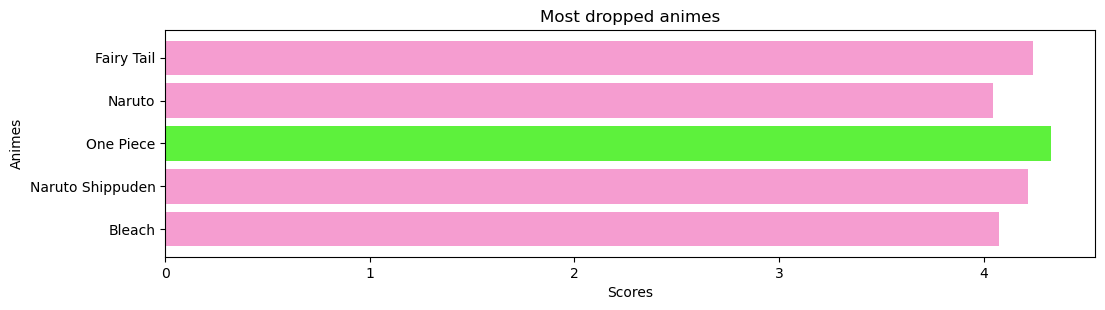

In [10]:
dropped = df2.sort_values(by=['dropped', 'score'], ascending=[False, False])

plt.figure(figsize=(12, 3), dpi=100)

color_map = ['#f59dd0' for _ in range(5)]
color_map[2] = '#5DF13C'


plt.barh(dropped['title'].head(5), dropped['score'].head(5), align='center', color=color_map)
plt.ylabel('Animes')
plt.xlabel('Scores')
plt.title('Most dropped animes');



In [11]:
display(dropped[['score','title','dropped', 'studios']].set_index('title').head(10))

#These are very good animes, but they're also dropped very frequently.

,score,dropped,studios
title,,,
Bleach,4.076322,19481,['Studio Pierrot']
Naruto Shippuden,4.217597,12813,['Studio Pierrot']
One Piece,4.328320,12445,['Toei Animation']
Naruto,4.044320,12124,['Studio Pierrot']
Fairy Tail,4.242833,9437,"['A-1 Pictures', 'Satelight']"
InuYasha,3.871658,8362,['Sunrise']
Death Note,4.464113,7830,['MADHOUSE']
Pokemon,3.490612,6915,['OLM']
Soul Eater,4.213439,6174,['Bones']


# Recommendation System

Now you need a recommendation system for people who have already watched anime. First we are going to use the review of each anime to make a matrix that will compute the Term Frequency-Inverse Document Frequency (TF-IDF).

In [12]:
#use all the data.

df['description'].head()

0    The foundation of alchemy is based on the law ...
1    Mitsuha and Taki are two total strangers livin...
2    After transferring into a new school, a deaf g...
3    Picking up where the second season ended, the ...
4    The battle to retake Wall Maria begins now! Wi...
Name: description, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

#create the object vector 
tfidf = TfidfVectorizer(stop_words='english')

#fill nans
df['description'] = df['description'].fillna('')

#fit and transform the description in a Term Frequency-Inverse Document Frequency (TF-IDF) matrix
tfidf_matrix =  tfidf.fit_transform(df['description'])

tfidf_matrix.shape



(14578, 31384)

31.384 words were used to describe the 14.578 animes. Next, compute the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)


In [14]:
from sklearn.metrics.pairwise import linear_kernel

#use the tfidf_matrix to pass into a linear kernel and get the cosine similarity matrix 
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [15]:
#create a index to pass the anime and get the idx
indice = pd.Series(df.index, index=df['title']).drop_duplicates()

display(indice.head())
print("A Silent Voice is in index: ", indice['A Silent Voice'])

title
Fullmetal Alchemist: Brotherhood                           0
your name.                                                 1
A Silent Voice                                             2
Haikyuu!! Karasuno High School vs Shiratorizawa Academy    3
Attack on Titan 3rd Season: Part II                        4
dtype: int64

A Silent Voice is in index:  2


In [16]:
#define a function to pass the anime and return the recommendations

def recommendation(title, cosine_sim=cosine_sim):
    #Get the index of the anime pass
    idx = indice[title]
    
    #make the pairwise similarity score
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    
    #sort base on similarity
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse =True)
    
    #get the 10 most similar
    sim_scores = sim_scores[1:11]
    
    #get the index in df
    anime_index = [i[0] for i in sim_scores]
    
    #return the animes
    return df['title'].iloc[anime_index]
    
    

In [17]:
recommendation('Attack on Titan 3rd Season: Part II')

125           Attack on Titan 2nd Season
81            Attack on Titan 3rd Season
5012        Attack on Titan: Junior High
14302                         Back Arrow
3247     Robotech: The Shadow Chronicles
7975              Happy Lucky Bikkuriman
919          Attack on Titan: Lost Girls
9020                   Attack on Skytree
3471                Sands of Destruction
12235                       Mermaid Song
Name: title, dtype: object

In [18]:
recommendation('One-Punch Man')

582                                 One-Punch Man Specials
484                                        One-Punch Man 2
468                            One-Punch Man: Road to Hero
11228             Kankou Taisen Saitama: Sakuya no Tatakai
6912                                      The Four Seasons
11114                                  Urawa no Usagi-chan
111                      Ascendance of a Bookworm: Part II
10450                    Norakuro Nitouhei: Enshuu no Maki
7496     Cautious Hero: The Hero Is Overpowered but Ove...
4138                                   One-Punch Man Recap
Name: title, dtype: object

Good, but this system get the similar words and structure in the review. That's why we get all the anime from the franchise in first place and also why we get animes from the Saitama Prefecture in the case of One-Punch Man. It's not a bad idea to watch everything that the anime has for you, but we are more sophisticated and want to get similar animes from the studio, the content warning and tags.

# Recommendation System Part.2

In [19]:
#create a copy of studios, we'll use this in the future to explore the data
df['copy_studios'] = df['studios']

features = ['studios','contentWarn', 'tags']

print(df[features].isna().sum())

studios        0
contentWarn    0
tags           0
dtype: int64


In [20]:
from ast import literal_eval

for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [21]:
#make a function to prepare the date
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ","")) for i in x]
    
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ",""))
        else:
            return ""

In [22]:
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [23]:
#create a function to put all the words in one 'soup'
def soup(x):
    return " ".join(x['studios']) + " " + " ".join(x['contentWarn']) + " " +" ".join(x['tags'])

df['soup'] = df.apply(soup, axis=1)
    

In [24]:
print(df['soup'][10])

bones  action comedy shounen psychicpowers psychological schoollife supernatural superpowers basedonamanga


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')

count_matrix = count.fit_transform(df['soup'])


In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the Cosine Similarity matrix based on the count_matrix,
#the count matrix don't down-weight the number of times a tag appears,
#in this case this is better


cosine_2 = cosine_similarity(count_matrix, count_matrix)

In [27]:
#create a index Serie to pass the anime
df = df.reset_index()
indice_2 = pd.Series(df.index, index=df['title'])

In [28]:
#get the recommendation 
recommendation('One-Punch Man', cosine_2)

4138                          One-Punch Man Recap
484                               One-Punch Man 2
582                        One-Punch Man Specials
468                   One-Punch Man: Road to Hero
456                        Tentai Senshi Sunred 2
1048                     One-Punch Man 2 Specials
1147       My Hero Academia: Training of the Dead
1250                         Tentai Senshi Sunred
1349    My Hero Academia: Jump Festa 2016 Special
2314                Tentai Senshi Sunred Specials
Name: title, dtype: object

In [29]:
recommendation('Paprika', cosine_2)

5453                                               Lensman
6113                               Galactic Patrol Lensman
3394                                               Harmony
3877                               Himitsu: The Revelation
1244                   Mardock Scramble: The Third Exhaust
10210                                Ultraviolet: Code 044
120      Legend of the Galactic Heroes: Die Neue These ...
9334                              Psycho Diver: Soul Siren
10244                                       D-1 Devastator
13058           Boku wa Robot Goshi no Kimi ni Koi wo Suru
Name: title, dtype: object

In [30]:
display(df[['title', 'mediaType', 'eps', 'duration', 'studios', 'tags', 'contentWarn', 'rating']].loc[df['title'] == 'Paprika'])
display(df[['title', 'mediaType', 'eps', 'duration', 'studios', 'tags', 'contentWarn', 'rating']].iloc[[5453, 6113, 3394, 3877]])

,title,mediaType,eps,duration,studios,tags,contentWarn,rating
587,Paprika,Movie,1.0,91.0,[madhouse],"[scifi, dreamworld, hacking, psychological, ba...",[nudity],4.255


,title,mediaType,eps,duration,studios,tags,contentWarn,rating
5453,Lensman,Movie,1.0,107.0,[madhouse],"[action, scifi, basedonanovel]",[],3.092
6113,Galactic Patrol Lensman,TV,25.0,NaN,[madhouse],"[action, scifi, basedonanovel]",[],2.954
3394,Harmony,Movie,1.0,120.0,[studio4°c],"[scifi, dystopia, psychological, terrorism, ba...","[maturethemes, nudity, suicide, violence]",3.533
3877,Himitsu: The Revelation,TV,26.0,NaN,[madhouse],"[drama, mystery, scifi, shoujo, detectives, dr...",[maturethemes],3.428


# **Pretty goods animes to watch, if you like Paprika. Now we can extract some info from the data.**

In [31]:
#get rid of the animes that hasn't been released 
df = df.loc[df['startYr'] <= 2020]

In [32]:
#make bins and labels for decades
bins = [i for i in range(1910,2021,10)]
labels = [str(i)+str("-")+str(i+10) for i in range(1910,2020,10)]

df['decade_of_released'] = pd.cut(df['startYr'], bins=bins, labels=labels)


In [33]:
tv_data = df.loc[df['mediaType'] == 'TV']
tv_data = tv_data.groupby('decade_of_released').count()['title']


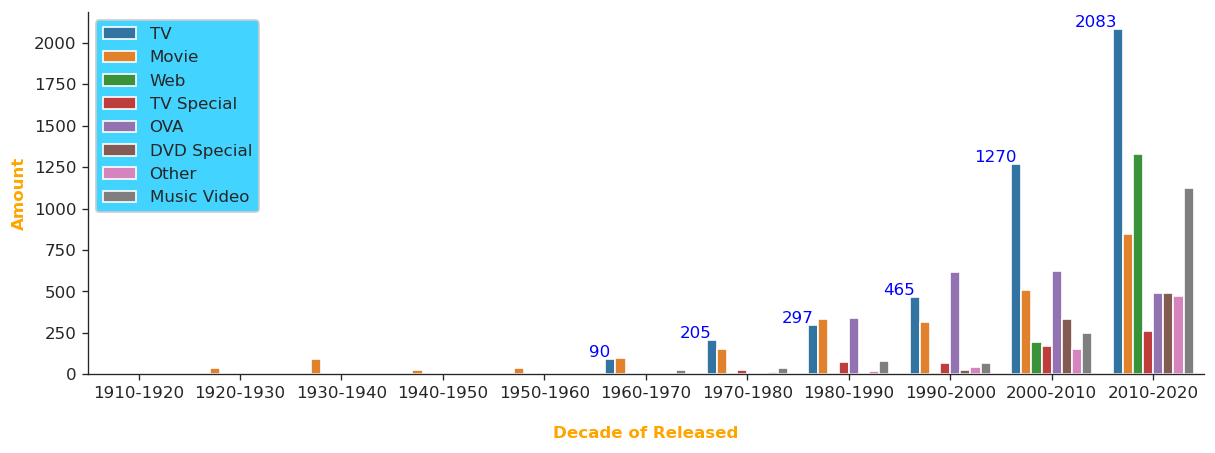

In [34]:

#plot

plt.figure(figsize=(12, 4), dpi=120)
sns.set_style("ticks")

splot = sns.countplot(x='decade_of_released', hue='mediaType', data=df)

for p in splot.patches:
    if p.get_height() in tv_data.values:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'right', va = 'center', xytext = (0, 4), textcoords = 'offset points', color='blue')
        
plt.ylabel("Amount", color='orange', fontweight='bold')
plt.xlabel("Decade of Released", color='orange', fontweight='bold', labelpad=15)
plt.legend(loc='upper left', facecolor='#42d3ff', framealpha=1)
sns.despine()
plt.show();

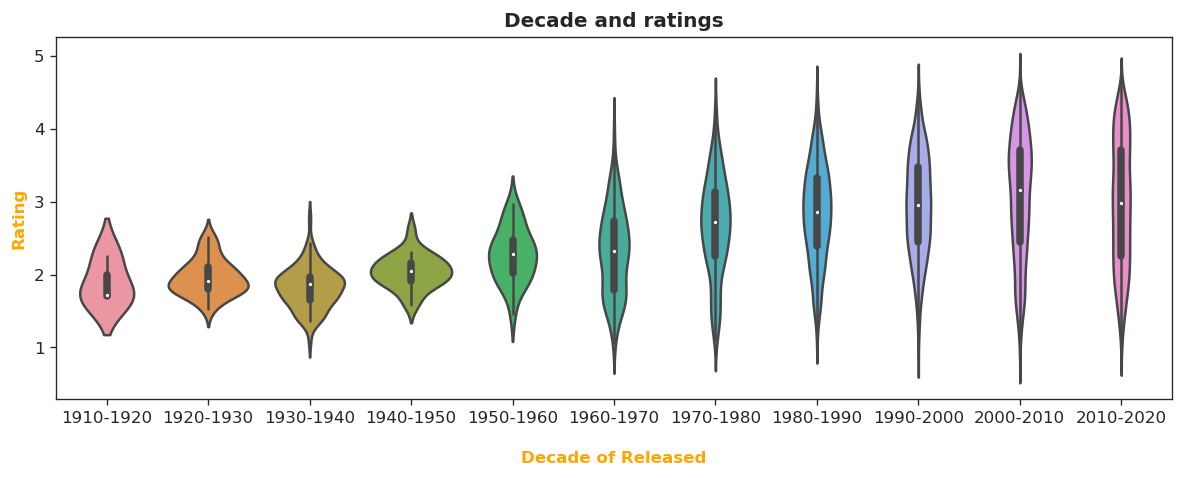

In [35]:
plt.figure(figsize=(12, 4), dpi=120)
scatter = sns.violinplot(data=df, x='decade_of_released', y='rating')

plt.ylabel("Rating", color='orange', fontweight='bold')
plt.xlabel("Decade of Released", color='orange', fontweight='bold', labelpad=15)
plt.title('Decade and ratings', fontweight='bold');

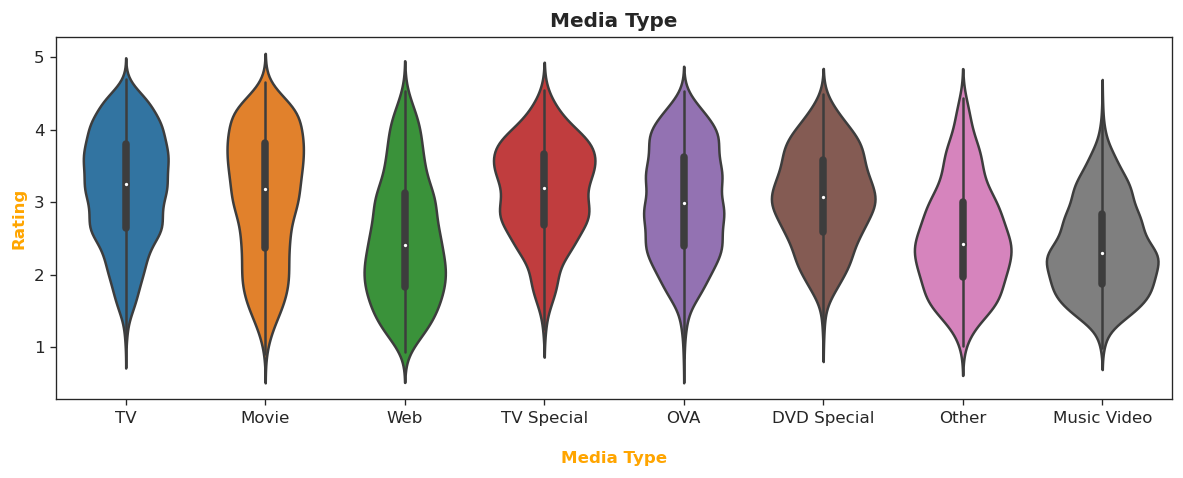

In [36]:
plt.figure(figsize=(12, 4), dpi=120)
scatter = sns.violinplot(data=df, x='mediaType', y='rating')
plt.ylabel("Rating", color='orange', fontweight='bold')
plt.xlabel("Media Type", color='orange', fontweight='bold', labelpad=15)
plt.title('Media Type', fontweight='bold');

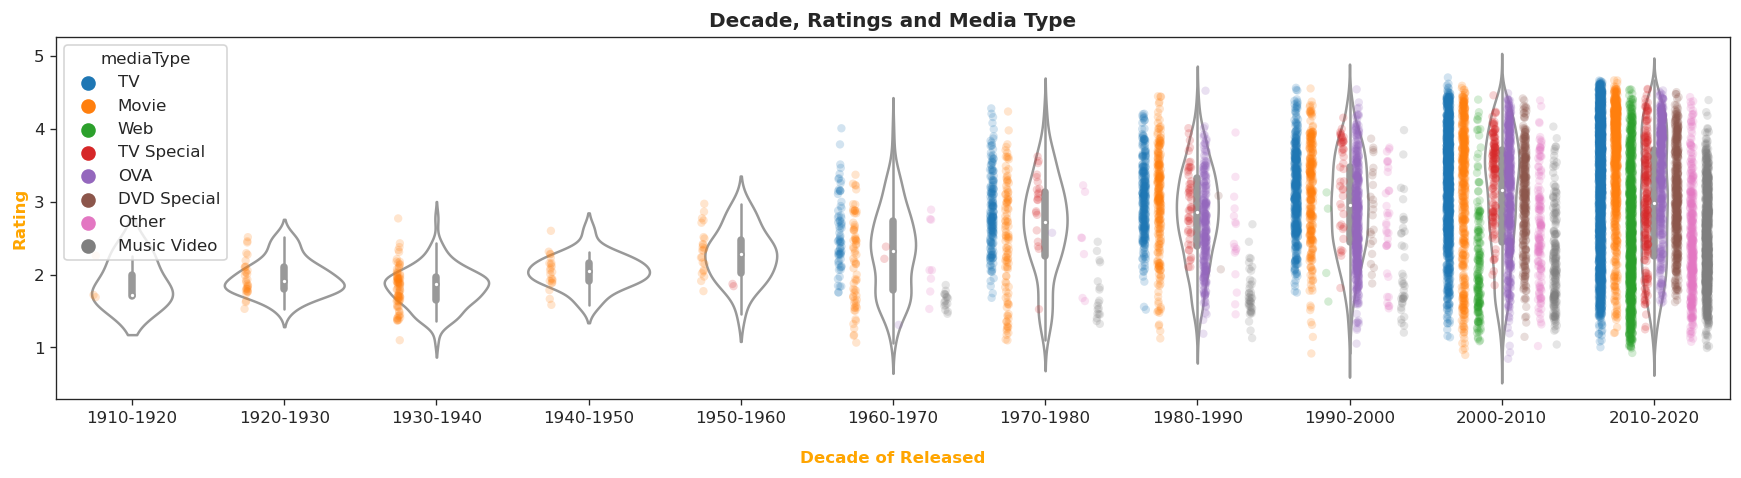

In [37]:
plt.figure(figsize=(18, 4), dpi=120)
sns.violinplot(data=df, x='decade_of_released', y='rating', color="white")
sns.stripplot(data=df, x='decade_of_released', y='rating', hue='mediaType', jitter=True,
                   dodge=True, 
                   marker='o', 
                   alpha=0.2)



plt.ylabel("Rating", color='orange', fontweight='bold')
plt.xlabel("Decade of Released", color='orange', fontweight='bold', labelpad=15)
plt.title('Decade, Ratings and Media Type', fontweight='bold');

It's been a long way since 1910 to 2020, starting with just a few movies to end up with a really good amount of material to watch. Take a look how Web was just 2 little dots in 1990-2000 to be a large a tick line en 2000-2010, and it hasn't "eat" the other types, because there's still Movies, Tv Specials, OVA's, and DVD

# Data Analysis
Now, let's take a look at the studios.

In [38]:
#fill the NaN with zeros
df['rating'] = df['rating'].fillna(0)


In [39]:
#The Copy Studios is not a list, but a string, so we need to clean that.
df['copy_studios'] = df['copy_studios'].str.replace('[', '')
df['copy_studios'] = df['copy_studios'].str.replace(']', '')
df['copy_studios'] = df['copy_studios'].str.replace("'", "")
df['copy_studios'] = df['copy_studios'].str.split(",")


In [40]:
#create a dict with each studio
cnt = {}

for idx, row in df.iterrows():
    rating = row['rating']
    studios = row['copy_studios']
    for studio in studios:      
        if not studio in cnt:
            cnt[studio] = {}
            cnt[studio].setdefault('productions', 1)
            score = float(rating) 
            cnt[studio]['rating'] = []
            cnt[studio]['rating'].append(score)
        else:
            score = float(rating)
            cnt[studio]['productions'] += 1
            cnt[studio]['rating'].append(score)
            



In [41]:
import numpy as np
#get the mean rating of the studios
for studio in cnt:
    cnt[studio]['rating'] = round(np.mean(cnt[studio]['rating']),2)
    

In [42]:
#make the dict a data frame
studios = pd.DataFrame.from_dict(cnt, orient='index')


In [43]:
#let's see the most prolific studios

more_productive_st = studios.sort_values(by=['productions', 'rating'], ascending = [False, False])[:20]
more_productive_st

,productions,rating
,4651,1.62
Toei Animation,685,2.87
Sunrise,442,3.24
TMS Entertainment,355,2.80
J.C. Staff,348,3.17
MADHOUSE,332,3.28
Studio Deen,267,3.27
Production I.G,266,3.40
Studio Pierrot,232,3.10
OLM,207,2.84


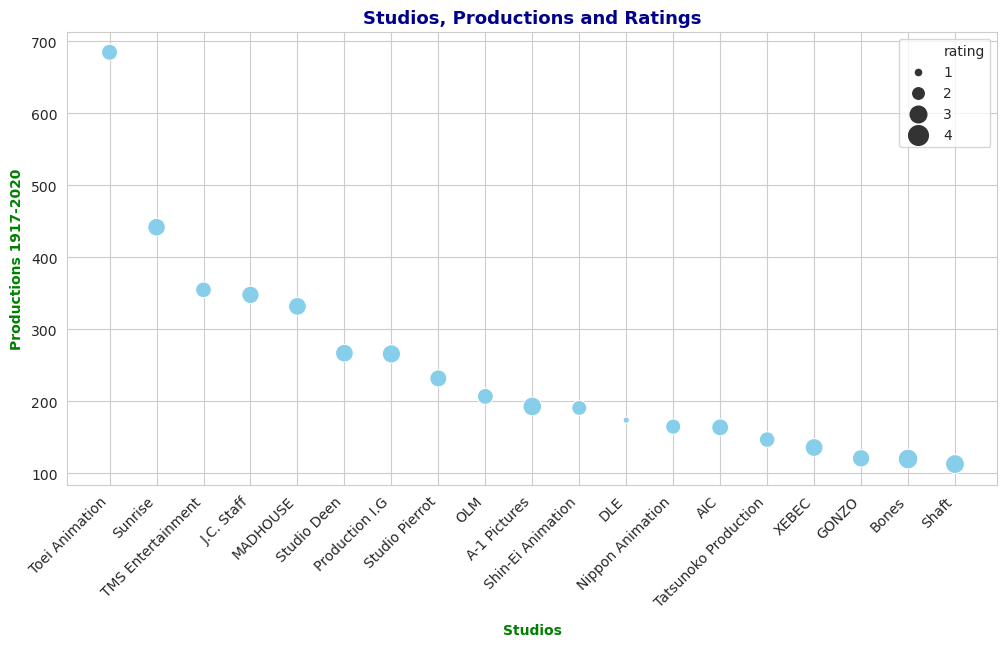

In [44]:
#plot the results

more_productive_st['studios'] = more_productive_st.index

sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 6), dpi=100)


gx2 = sns.scatterplot(x='studios', y="productions",data= more_productive_st[1:], size='rating', sizes=(20, 200), color="skyblue")


plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Studios', fontweight='bold', labelpad=10, color='green')
plt.ylabel('Productions 1917-2020', fontweight='bold', labelpad=5, color='green')
plt.title('Studios, Productions and Ratings', fontweight='bold', color='darkblue', fontsize=13)


plt.show()

**That's all. If you any recommendation to improve the notebook, please comment and
*Thanks!!***